In [1]:
# Before beginning this notebook you will need to add the following code to the query tool in pgAdmin: 
# ALTER TABLE counties ADD PRIMARY KEY (fips_date); ALTER TABLE hospitals ADD PRIMARY KEY (fips_date); ALTER TABLE vaccinations ADD PRIMARY KEY (fips_date);
# Additionally, you will need to enter your password into the connection_string variable in the config.py file. 
# The place holder text is YOURPASSWORDHERE

In [2]:
# Import dependencies
import sqlalchemy
from sqlalchemy import create_engine
import config
import pandas as pd
import psycopg2 as pg
import numpy as np

In [3]:
 # Create engine using the database file
engine = sqlalchemy.create_engine(config.connection_string)

In [4]:
# Create the connection
dbConnection = engine.connect();

In [5]:
# Join counties and hospitals tables into dataframe
merged_df = pd.read_sql("SELECT * FROM counties JOIN hospitals ON counties.fips_date = hospitals.fips_date", dbConnection);

In [6]:
# Create dataframe of vaccinations table
vaccinations_df = pd.read_sql("SELECT * FROM vaccinations", dbConnection);

In [7]:
# Create a list of the dataframes
dfs = [merged_df, vaccinations_df]

In [8]:
merged_df

,index,cases_to_date,deaths_to_date,fips_date,index,fips_code,collection_week,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,...,total_ped_patients_hospitalized_con_and_sus_covid_7_day_sum,total_ped_patients_hospitalized_con_covid_7_day_sum,inpatient_beds_7_day_sum,total_icu_beds_7_day_sum,total_staffed_adult_icu_beds_7_day_sum,icu_beds_used_7_day_sum,staffed_adult_icu_bed_occupancy_7_day_sum,staffed_icu_adult_patients_con_and_sus_covid_7_day_sum,staffed_icu_adult_patients_con_covid_7_day_sum,fips_date
0,21,26881,314,10012020-12-25,21,1001,2020-12-25,581,581,462,...,0,0,462,42,42,42,42,27,27,10012020-12-25
1,24,34774,382,10012021-01-15,24,1001,2021-01-15,602,602,462,...,0,0,462,42,42,42,42,39,39,10012021-01-15
2,25,36617,397,10012021-01-22,25,1001,2021-01-22,602,602,462,...,0,0,462,42,42,42,42,41,40,10012021-01-22
3,31,44055,639,10012021-03-05,31,1001,2021-03-05,602,602,462,...,0,0,462,42,42,40,40,22,22,10012021-03-05
4,33,45263,672,10012021-03-19,33,1001,2021-03-19,602,602,462,...,0,0,462,42,42,33,33,9,9,10012021-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110337,208898,1738,7,780202021-06-18,159852,78020,2021-06-18,924,868,728,...,0,0,784,56,56,45,45,0,0,780202021-06-18
110338,208902,1772,7,780202021-07-16,159856,78020,2021-07-16,924,868,728,...,0,0,784,56,56,35,35,14,14,780202021-07-16
110339,208911,2242,21,780202021-09-17,159865,78020,2021-09-17,924,868,728,...,0,0,784,56,56,54,54,0,0,780202021-09-17
110340,208912,2258,21,780202021-09-24,159866,78020,2021-09-24,924,868,728,...,0,0,784,56,56,29,29,7,7,780202021-09-24


In [9]:
for col in merged_df.columns:
    print(col)

index
cases_to_date
deaths_to_date
fips_date
index
fips_code
collection_week
total_beds_7_day_sum
all_adult_hospital_beds_7_day_sum
all_adult_hospital_inpatient_beds_7_day_sum
inpatient_beds_used_7_day_sum
all_adult_hospital_inpatient_bed_occupied_7_day_sum
total_adult_patients_hospitalized_con_and_sus_covid_7_day_sum
total_adult_patients_hospitalized_con_covid_7_day_sum
total_ped_patients_hospitalized_con_and_sus_covid_7_day_sum
total_ped_patients_hospitalized_con_covid_7_day_sum
inpatient_beds_7_day_sum
total_icu_beds_7_day_sum
total_staffed_adult_icu_beds_7_day_sum
icu_beds_used_7_day_sum
staffed_adult_icu_bed_occupancy_7_day_sum
staffed_icu_adult_patients_con_and_sus_covid_7_day_sum
staffed_icu_adult_patients_con_covid_7_day_sum
fips_date


In [10]:
column_numbers = [x for x in range(merged_df.shape[1])]

In [11]:
column_numbers .remove(0) #removing column integer index 0
merged_df = merged_df.iloc[:, column_numbers] #return all columns except the 0th column
merged_df

,cases_to_date,deaths_to_date,fips_date,index,fips_code,collection_week,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,...,total_ped_patients_hospitalized_con_and_sus_covid_7_day_sum,total_ped_patients_hospitalized_con_covid_7_day_sum,inpatient_beds_7_day_sum,total_icu_beds_7_day_sum,total_staffed_adult_icu_beds_7_day_sum,icu_beds_used_7_day_sum,staffed_adult_icu_bed_occupancy_7_day_sum,staffed_icu_adult_patients_con_and_sus_covid_7_day_sum,staffed_icu_adult_patients_con_covid_7_day_sum,fips_date
0,26881,314,10012020-12-25,21,1001,2020-12-25,581,581,462,445,...,0,0,462,42,42,42,42,27,27,10012020-12-25
1,34774,382,10012021-01-15,24,1001,2021-01-15,602,602,462,423,...,0,0,462,42,42,42,42,39,39,10012021-01-15
2,36617,397,10012021-01-22,25,1001,2021-01-22,602,602,462,360,...,0,0,462,42,42,42,42,41,40,10012021-01-22
3,44055,639,10012021-03-05,31,1001,2021-03-05,602,602,462,315,...,0,0,462,42,42,40,40,22,22,10012021-03-05
4,45263,672,10012021-03-19,33,1001,2021-03-19,602,602,462,284,...,0,0,462,42,42,33,33,9,9,10012021-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110337,1738,7,780202021-06-18,159852,78020,2021-06-18,924,868,728,387,...,0,0,784,56,56,45,45,0,0,780202021-06-18
110338,1772,7,780202021-07-16,159856,78020,2021-07-16,924,868,728,486,...,0,0,784,56,56,35,35,14,14,780202021-07-16
110339,2242,21,780202021-09-17,159865,78020,2021-09-17,924,868,728,475,...,0,0,784,56,56,54,54,0,0,780202021-09-17
110340,2258,21,780202021-09-24,159866,78020,2021-09-24,924,868,728,410,...,0,0,784,56,56,29,29,7,7,780202021-09-24


In [12]:
column_numbers = [x for x in range(merged_df.shape[1])]
column_numbers .remove(2) #removing column integer index 0
merged_df = merged_df.iloc[:, column_numbers] #return all columns except the 0th column
merged_df

,cases_to_date,deaths_to_date,index,fips_code,collection_week,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,...,total_ped_patients_hospitalized_con_and_sus_covid_7_day_sum,total_ped_patients_hospitalized_con_covid_7_day_sum,inpatient_beds_7_day_sum,total_icu_beds_7_day_sum,total_staffed_adult_icu_beds_7_day_sum,icu_beds_used_7_day_sum,staffed_adult_icu_bed_occupancy_7_day_sum,staffed_icu_adult_patients_con_and_sus_covid_7_day_sum,staffed_icu_adult_patients_con_covid_7_day_sum,fips_date
0,26881,314,21,1001,2020-12-25,581,581,462,445,445,...,0,0,462,42,42,42,42,27,27,10012020-12-25
1,34774,382,24,1001,2021-01-15,602,602,462,423,423,...,0,0,462,42,42,42,42,39,39,10012021-01-15
2,36617,397,25,1001,2021-01-22,602,602,462,360,360,...,0,0,462,42,42,42,42,41,40,10012021-01-22
3,44055,639,31,1001,2021-03-05,602,602,462,315,315,...,0,0,462,42,42,40,40,22,22,10012021-03-05
4,45263,672,33,1001,2021-03-19,602,602,462,284,284,...,0,0,462,42,42,33,33,9,9,10012021-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110337,1738,7,159852,78020,2021-06-18,924,868,728,387,359,...,0,0,784,56,56,45,45,0,0,780202021-06-18
110338,1772,7,159856,78020,2021-07-16,924,868,728,486,429,...,0,0,784,56,56,35,35,14,14,780202021-07-16
110339,2242,21,159865,78020,2021-09-17,924,868,728,475,423,...,0,0,784,56,56,54,54,0,0,780202021-09-17
110340,2258,21,159866,78020,2021-09-24,924,868,728,410,389,...,0,0,784,56,56,29,29,7,7,780202021-09-24


In [13]:
column_numbers = [x for x in range(merged_df.shape[1])]
column_numbers .remove(2) #removing column integer index 0
merged_df = merged_df.iloc[:, column_numbers] #return all columns except the 0th column
merged_df

,cases_to_date,deaths_to_date,fips_code,collection_week,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_con_and_sus_covid_7_day_sum,...,total_ped_patients_hospitalized_con_and_sus_covid_7_day_sum,total_ped_patients_hospitalized_con_covid_7_day_sum,inpatient_beds_7_day_sum,total_icu_beds_7_day_sum,total_staffed_adult_icu_beds_7_day_sum,icu_beds_used_7_day_sum,staffed_adult_icu_bed_occupancy_7_day_sum,staffed_icu_adult_patients_con_and_sus_covid_7_day_sum,staffed_icu_adult_patients_con_covid_7_day_sum,fips_date
0,26881,314,1001,2020-12-25,581,581,462,445,445,286,...,0,0,462,42,42,42,42,27,27,10012020-12-25
1,34774,382,1001,2021-01-15,602,602,462,423,423,250,...,0,0,462,42,42,42,42,39,39,10012021-01-15
2,36617,397,1001,2021-01-22,602,602,462,360,360,151,...,0,0,462,42,42,42,42,41,40,10012021-01-22
3,44055,639,1001,2021-03-05,602,602,462,315,315,77,...,0,0,462,42,42,40,40,22,22,10012021-03-05
4,45263,672,1001,2021-03-19,602,602,462,284,284,44,...,0,0,462,42,42,33,33,9,9,10012021-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110337,1738,7,78020,2021-06-18,924,868,728,387,359,11,...,0,0,784,56,56,45,45,0,0,780202021-06-18
110338,1772,7,78020,2021-07-16,924,868,728,486,429,69,...,0,0,784,56,56,35,35,14,14,780202021-07-16
110339,2242,21,78020,2021-09-17,924,868,728,475,423,7,...,0,0,784,56,56,54,54,0,0,780202021-09-17
110340,2258,21,78020,2021-09-24,924,868,728,410,389,20,...,0,0,784,56,56,29,29,7,7,780202021-09-24


In [14]:
for col in merged_df.columns:
    print(col)

cases_to_date
deaths_to_date
fips_code
collection_week
total_beds_7_day_sum
all_adult_hospital_beds_7_day_sum
all_adult_hospital_inpatient_beds_7_day_sum
inpatient_beds_used_7_day_sum
all_adult_hospital_inpatient_bed_occupied_7_day_sum
total_adult_patients_hospitalized_con_and_sus_covid_7_day_sum
total_adult_patients_hospitalized_con_covid_7_day_sum
total_ped_patients_hospitalized_con_and_sus_covid_7_day_sum
total_ped_patients_hospitalized_con_covid_7_day_sum
inpatient_beds_7_day_sum
total_icu_beds_7_day_sum
total_staffed_adult_icu_beds_7_day_sum
icu_beds_used_7_day_sum
staffed_adult_icu_bed_occupancy_7_day_sum
staffed_icu_adult_patients_con_and_sus_covid_7_day_sum
staffed_icu_adult_patients_con_covid_7_day_sum
fips_date


In [15]:
# Create ratio columns for bed usage (ICU and inpatient)

In [16]:
for col in vaccinations_df.columns:
    print(col)

index
Series_Complete_Pop_Pct
Series_Complete_Yes
Series_Complete_18Plus
Series_Complete_18PlusPop_Pct
Series_Complete_65Plus
Series_Complete_65PlusPop_Pct
Completeness_pct
Administered_Dose1_Pop_Pct
Administered_Dose1_Recip_18PlusPop_Pct
Administered_Dose1_Recip_65PlusPop_Pct
fips_date


In [17]:
ml_ready_df = merged_df.merge(vaccinations_df, how='inner', on='fips_date')
ml_ready_df

,cases_to_date,deaths_to_date,fips_code,collection_week,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_con_and_sus_covid_7_day_sum,...,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct
0,26881,314,1001,2020-12-25,581,581,462,445,445,286,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,34774,382,1001,2021-01-15,602,602,462,423,423,250,...,0.2,115,115,0.3,10,0.1,94.2,1.2,1.5,1.1
2,36617,397,1001,2021-01-22,602,602,462,360,360,151,...,0.4,248,248,0.6,24,0.3,93.3,2.3,3.0,6.1
3,44055,639,1001,2021-03-05,602,602,462,315,315,77,...,4.1,2296,2295,5.3,1314,14.7,94.1,9.3,12.1,31.4
4,45263,672,1001,2021-03-19,602,602,462,284,284,44,...,6.8,3776,3775,8.8,2100,23.5,93.8,12.5,16.2,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110337,1738,7,78020,2021-06-18,924,868,728,387,359,11,...,0.0,2297,2261,0.0,646,0.0,83.7,0.0,0.0,0.0
110338,1772,7,78020,2021-07-16,924,868,728,486,429,69,...,0.0,2412,2363,0.0,655,0.0,84.1,0.0,0.0,0.0
110339,2242,21,78020,2021-09-17,924,868,728,475,423,7,...,0.0,2714,2509,0.0,667,0.0,85.5,0.0,0.0,0.0
110340,2258,21,78020,2021-09-24,924,868,728,410,389,20,...,0.0,2737,2529,0.0,668,0.0,85.8,0.0,0.0,0.0


In [18]:
for col in ml_ready_df.columns:
    print(col)

cases_to_date
deaths_to_date
fips_code
collection_week
total_beds_7_day_sum
all_adult_hospital_beds_7_day_sum
all_adult_hospital_inpatient_beds_7_day_sum
inpatient_beds_used_7_day_sum
all_adult_hospital_inpatient_bed_occupied_7_day_sum
total_adult_patients_hospitalized_con_and_sus_covid_7_day_sum
total_adult_patients_hospitalized_con_covid_7_day_sum
total_ped_patients_hospitalized_con_and_sus_covid_7_day_sum
total_ped_patients_hospitalized_con_covid_7_day_sum
inpatient_beds_7_day_sum
total_icu_beds_7_day_sum
total_staffed_adult_icu_beds_7_day_sum
icu_beds_used_7_day_sum
staffed_adult_icu_bed_occupancy_7_day_sum
staffed_icu_adult_patients_con_and_sus_covid_7_day_sum
staffed_icu_adult_patients_con_covid_7_day_sum
fips_date
index
Series_Complete_Pop_Pct
Series_Complete_Yes
Series_Complete_18Plus
Series_Complete_18PlusPop_Pct
Series_Complete_65Plus
Series_Complete_65PlusPop_Pct
Completeness_pct
Administered_Dose1_Pop_Pct
Administered_Dose1_Recip_18PlusPop_Pct
Administered_Dose1_Recip_65Plu

In [19]:
ml_ready_df = ml_ready_df.drop('index', 1)
ml_ready_df

,cases_to_date,deaths_to_date,fips_code,collection_week,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_con_and_sus_covid_7_day_sum,...,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct
0,26881,314,1001,2020-12-25,581,581,462,445,445,286,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,34774,382,1001,2021-01-15,602,602,462,423,423,250,...,0.2,115,115,0.3,10,0.1,94.2,1.2,1.5,1.1
2,36617,397,1001,2021-01-22,602,602,462,360,360,151,...,0.4,248,248,0.6,24,0.3,93.3,2.3,3.0,6.1
3,44055,639,1001,2021-03-05,602,602,462,315,315,77,...,4.1,2296,2295,5.3,1314,14.7,94.1,9.3,12.1,31.4
4,45263,672,1001,2021-03-19,602,602,462,284,284,44,...,6.8,3776,3775,8.8,2100,23.5,93.8,12.5,16.2,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110337,1738,7,78020,2021-06-18,924,868,728,387,359,11,...,0.0,2297,2261,0.0,646,0.0,83.7,0.0,0.0,0.0
110338,1772,7,78020,2021-07-16,924,868,728,486,429,69,...,0.0,2412,2363,0.0,655,0.0,84.1,0.0,0.0,0.0
110339,2242,21,78020,2021-09-17,924,868,728,475,423,7,...,0.0,2714,2509,0.0,667,0.0,85.5,0.0,0.0,0.0
110340,2258,21,78020,2021-09-24,924,868,728,410,389,20,...,0.0,2737,2529,0.0,668,0.0,85.8,0.0,0.0,0.0


In [20]:
ml_ready_df["Percentage_inpatient_beds_used"] = ml_ready_df["inpatient_beds_used_7_day_sum"]/ml_ready_df["inpatient_beds_7_day_sum"]
ml_ready_df

,cases_to_date,deaths_to_date,fips_code,collection_week,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_con_and_sus_covid_7_day_sum,...,Series_Complete_Yes,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,Percentage_inpatient_beds_used
0,26881,314,1001,2020-12-25,581,581,462,445,445,286,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.963203
1,34774,382,1001,2021-01-15,602,602,462,423,423,250,...,115,115,0.3,10,0.1,94.2,1.2,1.5,1.1,0.915584
2,36617,397,1001,2021-01-22,602,602,462,360,360,151,...,248,248,0.6,24,0.3,93.3,2.3,3.0,6.1,0.779221
3,44055,639,1001,2021-03-05,602,602,462,315,315,77,...,2296,2295,5.3,1314,14.7,94.1,9.3,12.1,31.4,0.681818
4,45263,672,1001,2021-03-19,602,602,462,284,284,44,...,3776,3775,8.8,2100,23.5,93.8,12.5,16.2,40.0,0.614719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110337,1738,7,78020,2021-06-18,924,868,728,387,359,11,...,2297,2261,0.0,646,0.0,83.7,0.0,0.0,0.0,0.493622
110338,1772,7,78020,2021-07-16,924,868,728,486,429,69,...,2412,2363,0.0,655,0.0,84.1,0.0,0.0,0.0,0.619898
110339,2242,21,78020,2021-09-17,924,868,728,475,423,7,...,2714,2509,0.0,667,0.0,85.5,0.0,0.0,0.0,0.605867
110340,2258,21,78020,2021-09-24,924,868,728,410,389,20,...,2737,2529,0.0,668,0.0,85.8,0.0,0.0,0.0,0.522959


In [21]:
ml_ready_df["Percentage_ICU_beds_used"] = ml_ready_df["icu_beds_used_7_day_sum"]/ml_ready_df["total_icu_beds_7_day_sum"]
ml_ready_df

,cases_to_date,deaths_to_date,fips_code,collection_week,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_con_and_sus_covid_7_day_sum,...,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,Percentage_inpatient_beds_used,Percentage_ICU_beds_used
0,26881,314,1001,2020-12-25,581,581,462,445,445,286,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.963203,1.000000
1,34774,382,1001,2021-01-15,602,602,462,423,423,250,...,115,0.3,10,0.1,94.2,1.2,1.5,1.1,0.915584,1.000000
2,36617,397,1001,2021-01-22,602,602,462,360,360,151,...,248,0.6,24,0.3,93.3,2.3,3.0,6.1,0.779221,1.000000
3,44055,639,1001,2021-03-05,602,602,462,315,315,77,...,2295,5.3,1314,14.7,94.1,9.3,12.1,31.4,0.681818,0.952381
4,45263,672,1001,2021-03-19,602,602,462,284,284,44,...,3775,8.8,2100,23.5,93.8,12.5,16.2,40.0,0.614719,0.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110337,1738,7,78020,2021-06-18,924,868,728,387,359,11,...,2261,0.0,646,0.0,83.7,0.0,0.0,0.0,0.493622,0.803571
110338,1772,7,78020,2021-07-16,924,868,728,486,429,69,...,2363,0.0,655,0.0,84.1,0.0,0.0,0.0,0.619898,0.625000
110339,2242,21,78020,2021-09-17,924,868,728,475,423,7,...,2509,0.0,667,0.0,85.5,0.0,0.0,0.0,0.605867,0.964286
110340,2258,21,78020,2021-09-24,924,868,728,410,389,20,...,2529,0.0,668,0.0,85.8,0.0,0.0,0.0,0.522959,0.517857


In [22]:
ml_ready_df["total_patients_hospitalized_con_and_sus_covid_7_day_sum"] = ml_ready_df["total_adult_patients_hospitalized_con_and_sus_covid_7_day_sum"]+ml_ready_df["total_ped_patients_hospitalized_con_and_sus_covid_7_day_sum"]
ml_ready_df

,cases_to_date,deaths_to_date,fips_code,collection_week,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_con_and_sus_covid_7_day_sum,...,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,Percentage_inpatient_beds_used,Percentage_ICU_beds_used,total_patients_hospitalized_con_and_sus_covid_7_day_sum
0,26881,314,1001,2020-12-25,581,581,462,445,445,286,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.963203,1.000000,286
1,34774,382,1001,2021-01-15,602,602,462,423,423,250,...,0.3,10,0.1,94.2,1.2,1.5,1.1,0.915584,1.000000,250
2,36617,397,1001,2021-01-22,602,602,462,360,360,151,...,0.6,24,0.3,93.3,2.3,3.0,6.1,0.779221,1.000000,151
3,44055,639,1001,2021-03-05,602,602,462,315,315,77,...,5.3,1314,14.7,94.1,9.3,12.1,31.4,0.681818,0.952381,77
4,45263,672,1001,2021-03-19,602,602,462,284,284,44,...,8.8,2100,23.5,93.8,12.5,16.2,40.0,0.614719,0.785714,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110337,1738,7,78020,2021-06-18,924,868,728,387,359,11,...,0.0,646,0.0,83.7,0.0,0.0,0.0,0.493622,0.803571,11
110338,1772,7,78020,2021-07-16,924,868,728,486,429,69,...,0.0,655,0.0,84.1,0.0,0.0,0.0,0.619898,0.625000,69
110339,2242,21,78020,2021-09-17,924,868,728,475,423,7,...,0.0,667,0.0,85.5,0.0,0.0,0.0,0.605867,0.964286,7
110340,2258,21,78020,2021-09-24,924,868,728,410,389,20,...,0.0,668,0.0,85.8,0.0,0.0,0.0,0.522959,0.517857,20


In [23]:
ml_ready_df["total_patients_hospitalized_con_covid_7_day_sum"] = ml_ready_df["total_adult_patients_hospitalized_con_covid_7_day_sum"]+ml_ready_df["total_ped_patients_hospitalized_con_covid_7_day_sum"]
ml_ready_df

,cases_to_date,deaths_to_date,fips_code,collection_week,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_con_and_sus_covid_7_day_sum,...,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,Percentage_inpatient_beds_used,Percentage_ICU_beds_used,total_patients_hospitalized_con_and_sus_covid_7_day_sum,total_patients_hospitalized_con_covid_7_day_sum
0,26881,314,1001,2020-12-25,581,581,462,445,445,286,...,0,0.0,0.0,0.0,0.0,0.0,0.963203,1.000000,286,281
1,34774,382,1001,2021-01-15,602,602,462,423,423,250,...,10,0.1,94.2,1.2,1.5,1.1,0.915584,1.000000,250,247
2,36617,397,1001,2021-01-22,602,602,462,360,360,151,...,24,0.3,93.3,2.3,3.0,6.1,0.779221,1.000000,151,149
3,44055,639,1001,2021-03-05,602,602,462,315,315,77,...,1314,14.7,94.1,9.3,12.1,31.4,0.681818,0.952381,77,76
4,45263,672,1001,2021-03-19,602,602,462,284,284,44,...,2100,23.5,93.8,12.5,16.2,40.0,0.614719,0.785714,44,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110337,1738,7,78020,2021-06-18,924,868,728,387,359,11,...,646,0.0,83.7,0.0,0.0,0.0,0.493622,0.803571,11,11
110338,1772,7,78020,2021-07-16,924,868,728,486,429,69,...,655,0.0,84.1,0.0,0.0,0.0,0.619898,0.625000,69,69
110339,2242,21,78020,2021-09-17,924,868,728,475,423,7,...,667,0.0,85.5,0.0,0.0,0.0,0.605867,0.964286,7,7
110340,2258,21,78020,2021-09-24,924,868,728,410,389,20,...,668,0.0,85.8,0.0,0.0,0.0,0.522959,0.517857,20,20


In [24]:
ml_ready_df.replace([np.inf, -np.inf], np.nan)

,cases_to_date,deaths_to_date,fips_code,collection_week,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_con_and_sus_covid_7_day_sum,...,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,Percentage_inpatient_beds_used,Percentage_ICU_beds_used,total_patients_hospitalized_con_and_sus_covid_7_day_sum,total_patients_hospitalized_con_covid_7_day_sum
0,26881,314,1001,2020-12-25,581,581,462,445,445,286,...,0,0.0,0.0,0.0,0.0,0.0,0.963203,1.000000,286,281
1,34774,382,1001,2021-01-15,602,602,462,423,423,250,...,10,0.1,94.2,1.2,1.5,1.1,0.915584,1.000000,250,247
2,36617,397,1001,2021-01-22,602,602,462,360,360,151,...,24,0.3,93.3,2.3,3.0,6.1,0.779221,1.000000,151,149
3,44055,639,1001,2021-03-05,602,602,462,315,315,77,...,1314,14.7,94.1,9.3,12.1,31.4,0.681818,0.952381,77,76
4,45263,672,1001,2021-03-19,602,602,462,284,284,44,...,2100,23.5,93.8,12.5,16.2,40.0,0.614719,0.785714,44,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110337,1738,7,78020,2021-06-18,924,868,728,387,359,11,...,646,0.0,83.7,0.0,0.0,0.0,0.493622,0.803571,11,11
110338,1772,7,78020,2021-07-16,924,868,728,486,429,69,...,655,0.0,84.1,0.0,0.0,0.0,0.619898,0.625000,69,69
110339,2242,21,78020,2021-09-17,924,868,728,475,423,7,...,667,0.0,85.5,0.0,0.0,0.0,0.605867,0.964286,7,7
110340,2258,21,78020,2021-09-24,924,868,728,410,389,20,...,668,0.0,85.8,0.0,0.0,0.0,0.522959,0.517857,20,20


In [25]:
ml_ready_df.dropna()

,cases_to_date,deaths_to_date,fips_code,collection_week,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_con_and_sus_covid_7_day_sum,...,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,Percentage_inpatient_beds_used,Percentage_ICU_beds_used,total_patients_hospitalized_con_and_sus_covid_7_day_sum,total_patients_hospitalized_con_covid_7_day_sum
0,26881,314,1001,2020-12-25,581,581,462,445,445,286,...,0,0.0,0.0,0.0,0.0,0.0,0.963203,1.000000,286,281
1,34774,382,1001,2021-01-15,602,602,462,423,423,250,...,10,0.1,94.2,1.2,1.5,1.1,0.915584,1.000000,250,247
2,36617,397,1001,2021-01-22,602,602,462,360,360,151,...,24,0.3,93.3,2.3,3.0,6.1,0.779221,1.000000,151,149
3,44055,639,1001,2021-03-05,602,602,462,315,315,77,...,1314,14.7,94.1,9.3,12.1,31.4,0.681818,0.952381,77,76
4,45263,672,1001,2021-03-19,602,602,462,284,284,44,...,2100,23.5,93.8,12.5,16.2,40.0,0.614719,0.785714,44,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110337,1738,7,78020,2021-06-18,924,868,728,387,359,11,...,646,0.0,83.7,0.0,0.0,0.0,0.493622,0.803571,11,11
110338,1772,7,78020,2021-07-16,924,868,728,486,429,69,...,655,0.0,84.1,0.0,0.0,0.0,0.619898,0.625000,69,69
110339,2242,21,78020,2021-09-17,924,868,728,475,423,7,...,667,0.0,85.5,0.0,0.0,0.0,0.605867,0.964286,7,7
110340,2258,21,78020,2021-09-24,924,868,728,410,389,20,...,668,0.0,85.8,0.0,0.0,0.0,0.522959,0.517857,20,20


In [26]:
ml_ready_df.dtypes

cases_to_date                                                             int64
deaths_to_date                                                            int64
fips_code                                                                object
collection_week                                                  datetime64[ns]
total_beds_7_day_sum                                                      int64
all_adult_hospital_beds_7_day_sum                                         int64
all_adult_hospital_inpatient_beds_7_day_sum                               int64
inpatient_beds_used_7_day_sum                                             int64
all_adult_hospital_inpatient_bed_occupied_7_day_sum                       int64
total_adult_patients_hospitalized_con_and_sus_covid_7_day_sum             int64
total_adult_patients_hospitalized_con_covid_7_day_sum                     int64
total_ped_patients_hospitalized_con_and_sus_covid_7_day_sum               int64
total_ped_patients_hospitalized_con_covi

In [27]:
ml_ready_df = ml_ready_df.astype({'fips_code': 'int64'})

In [28]:
ml_ready_df.dtypes

cases_to_date                                                             int64
deaths_to_date                                                            int64
fips_code                                                                 int64
collection_week                                                  datetime64[ns]
total_beds_7_day_sum                                                      int64
all_adult_hospital_beds_7_day_sum                                         int64
all_adult_hospital_inpatient_beds_7_day_sum                               int64
inpatient_beds_used_7_day_sum                                             int64
all_adult_hospital_inpatient_bed_occupied_7_day_sum                       int64
total_adult_patients_hospitalized_con_and_sus_covid_7_day_sum             int64
total_adult_patients_hospitalized_con_covid_7_day_sum                     int64
total_ped_patients_hospitalized_con_and_sus_covid_7_day_sum               int64
total_ped_patients_hospitalized_con_covi

In [29]:
ml_ready_df.sort_values(by=['fips_date'], inplace=True)

Data Exploration Charts

In [36]:
multnomah_df = ml_ready_df[ml_ready_df["fips_code"] == 41051]
multnomah_df

,cases_to_date,deaths_to_date,fips_code,collection_week,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_con_and_sus_covid_7_day_sum,...,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,Percentage_inpatient_beds_used,Percentage_ICU_beds_used,total_patients_hospitalized_con_and_sus_covid_7_day_sum,total_patients_hospitalized_con_covid_7_day_sum
102684,153121,2275,41051,2020-12-18,16542,14468,10892,10510,9131,1081,...,0,0.0,0.0,0.0,0.0,0.0,0.829453,0.771649,1081,888
75216,165291,2619,41051,2020-12-25,16281,14201,10766,9710,8595,1008,...,0,0.0,0.0,0.0,0.0,0.0,0.773151,0.717723,1044,838
47553,174411,2740,41051,2021-01-01,16291,14227,10859,10192,8981,0,...,0,0.0,0.0,0.0,0.0,0.0,0.805947,0.746321,42,730
75217,183029,2841,41051,2021-01-08,16524,14409,11053,10559,9162,834,...,34,0.0,97.0,1.9,2.3,1.3,0.819734,0.753706,863,665
102685,192256,3017,41051,2021-01-15,16968,14863,10917,10479,9110,0,...,347,0.3,97.8,3.6,4.4,2.5,0.822786,0.729745,48,798
20125,200030,3235,41051,2021-01-22,18582,16468,11018,10533,9147,859,...,857,0.8,98.1,6.4,7.9,5.8,0.820519,0.732794,897,700
47554,205760,3305,41051,2021-01-29,18568,16487,11017,10646,9188,865,...,1414,1.3,98.0,8.3,10.1,10.2,0.829709,1.170468,906,677
102686,211405,3391,41051,2021-02-05,18686,16584,11126,10438,9119,720,...,2612,2.3,98.3,10.3,12.6,13.1,0.805526,0.746720,720,559
102687,215938,3454,41051,2021-02-12,18700,16588,11133,10617,9206,625,...,4265,3.8,98.4,12.1,14.7,16.7,0.817384,0.769767,668,498
20126,219078,3596,41051,2021-02-19,18708,16581,11084,10724,9293,399,...,7848,7.0,98.3,13.6,16.6,21.2,0.825876,0.780000,451,295


In [67]:
%matplotlib inline

In [42]:
import matplotlib.pyplot as plt

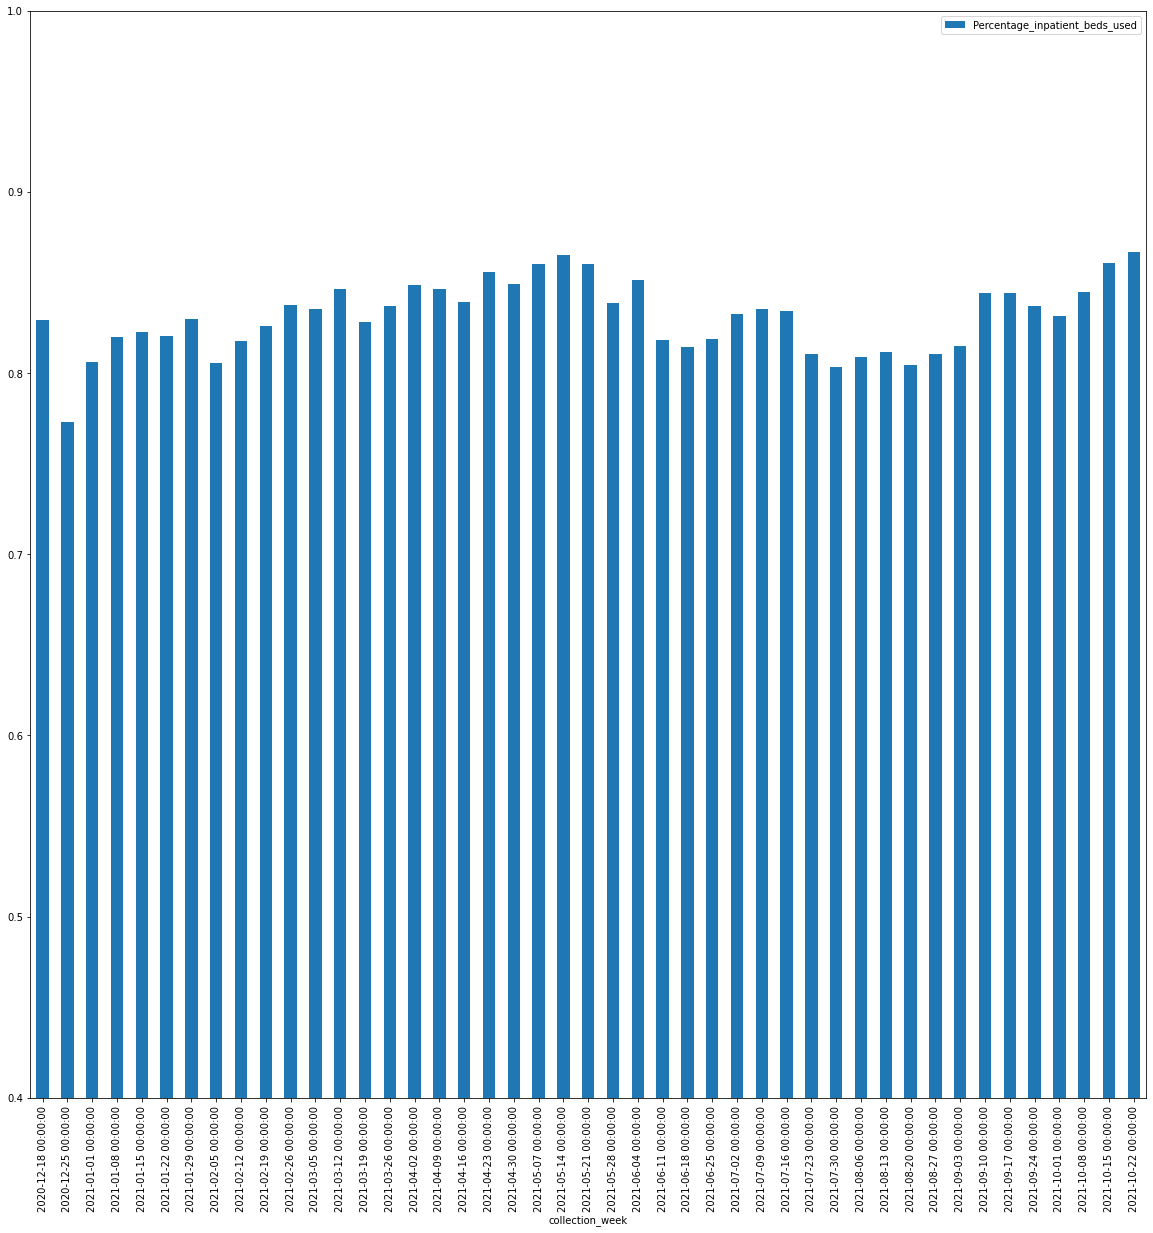

In [70]:
multnomah_df.plot.bar(x="collection_week", y="Percentage_inpatient_beds_used", figsize=(20, 20))
plt.ylim(top=1.0)
plt.ylim(bottom=0.4)
plt.savefig('Percentage of Inpatient Beds Used Multnomah County')
plt.show()

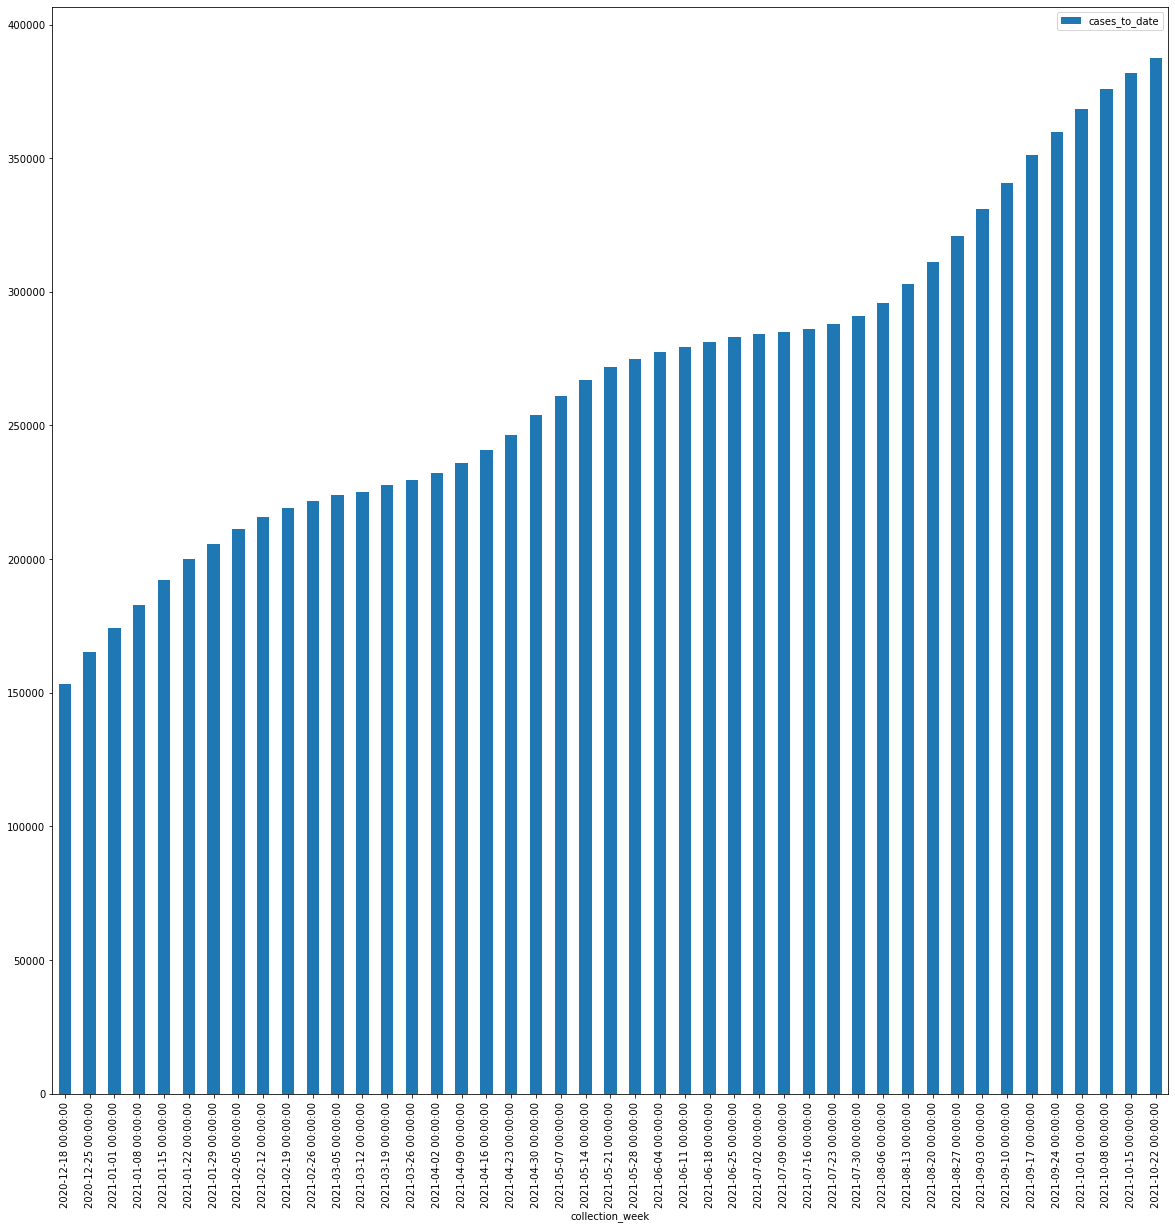

In [71]:
multnomah_df.plot.bar(x="collection_week", y="cases_to_date", figsize=(20, 20))
plt.savefig('Cases to Date Multnomah County')
plt.show()

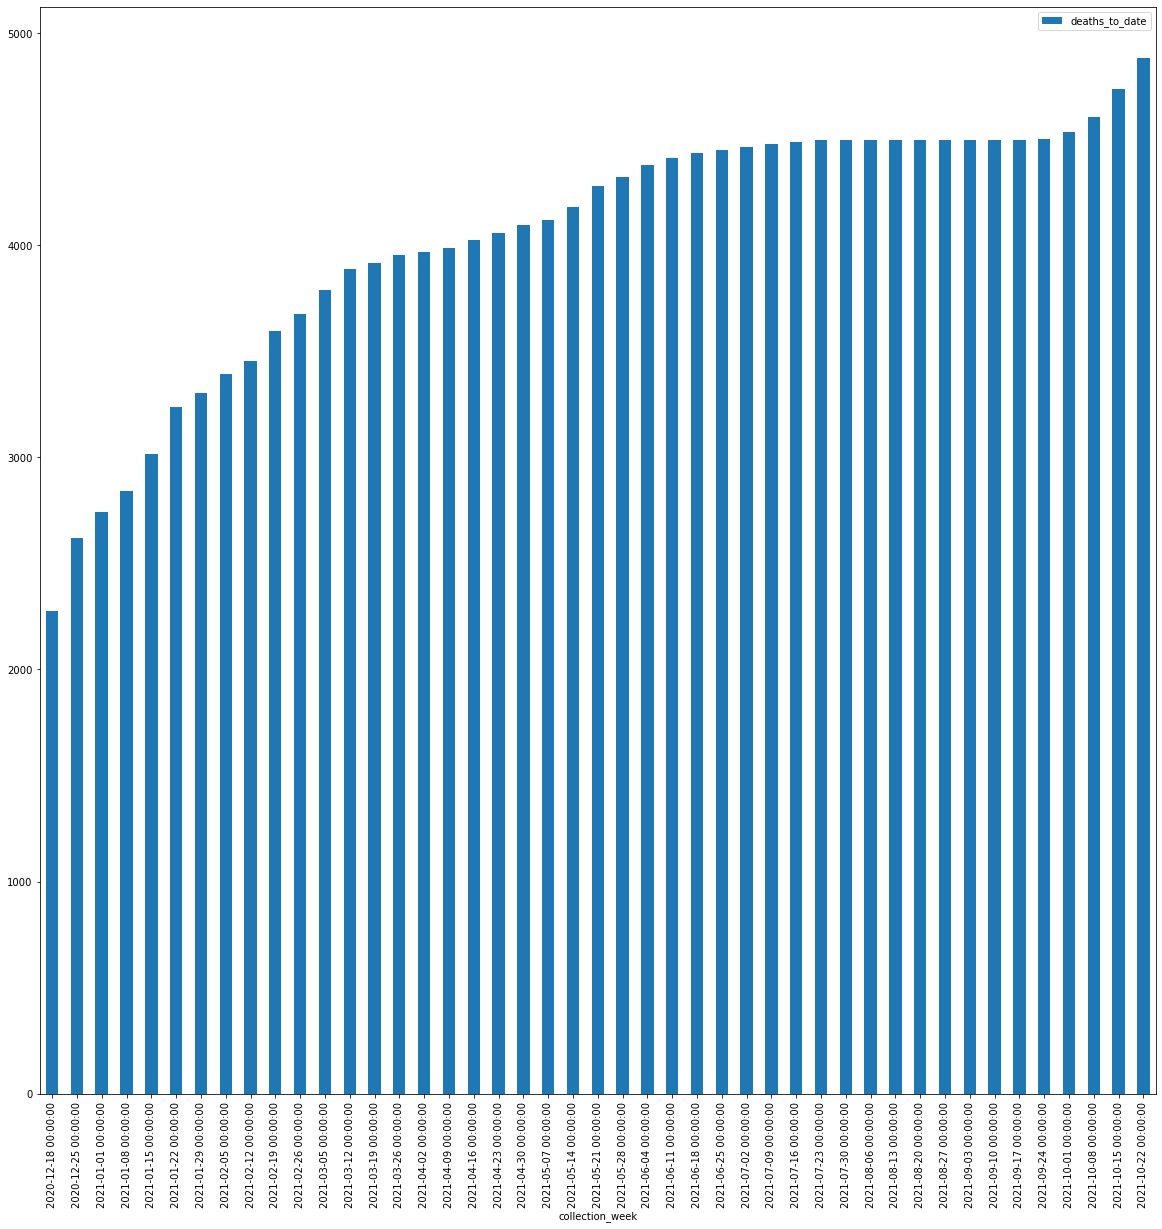

In [72]:
multnomah_df.plot.bar(x="collection_week", y="deaths_to_date", figsize=(20, 20))
plt.savefig('Deaths to Date Multnomah County')
plt.show()

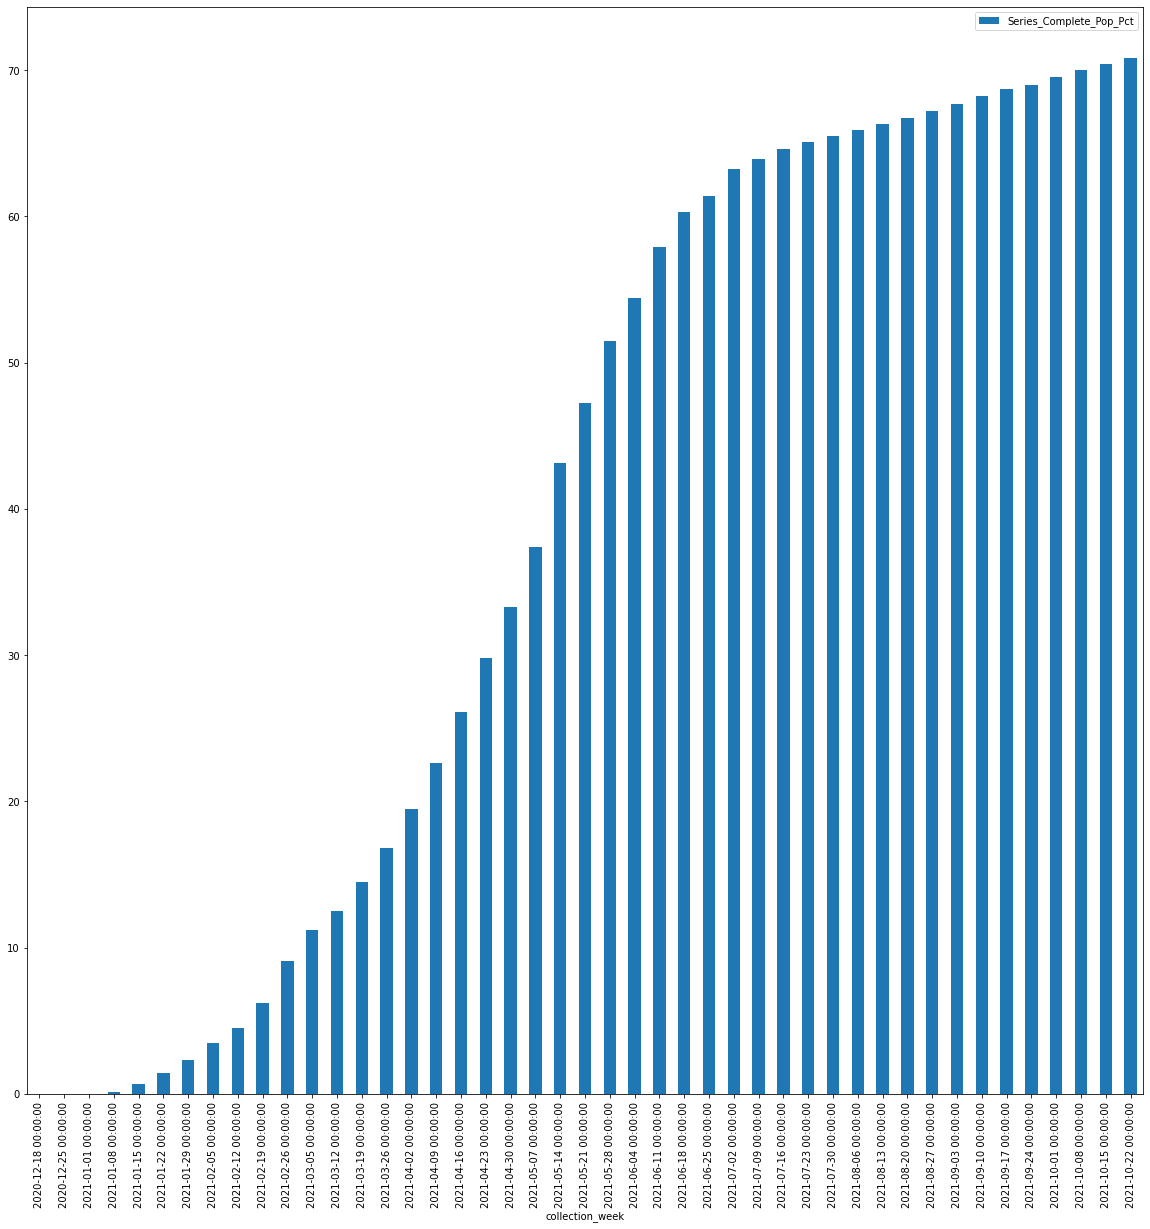

In [73]:
multnomah_df.plot.bar(x="collection_week", y="Series_Complete_Pop_Pct", figsize=(20, 20))
plt.savefig('Percent of Population Fully Vaccinated Multnomah County')
plt.show()